In [1]:
from cryptocourse import basic_dh
from cryptocourse import primes
from cryptocourse import euclidean
from cryptocourse import basic_ec
from cryptocourse import galois
import math
import argon2
import binascii
import passlib
import hashlib
from operator import xor

# Commonly used functions

In [4]:
#Grootste Gemene Deler
math.gcd(1160718174,316258250)

#Multiplicative inverse => getal waarmee grondgetal vermenigvuldigd word om 1 te krijgen in modulo
# 5 * x = 1 mod 7
# 5 * 3 = 15 = 1 mod 7
euclidean.mulinv(1279,9721)


6468

# Adding Polyonomials

In [5]:
from cryptocourse import galois
p = galois.Polynomial(5,1,2,3,4)
q = galois.Polynomial(5,1,2,0,0)

print(p)
print(q)

print(p+q)
print(p+(-q))

p = galois.Polynomial(2,1,2,3,4)


p = galois.Polynomial(2,1,1,1,1)
q = galois.Polynomial(2,1,0,1)
print(p)
print(q)
print(p+q)
print(p+(-q))


Polynomial (modulo 5) : 1*x^3+2*x^2+3*x+4
Polynomial (modulo 5) : 1*x^3+2*x^2+0
Polynomial (modulo 5) : 2*x^3+4*x^2+3*x+4
Polynomial (modulo 5) : 3*x+4
Polynomial (modulo 2) : 1*x^3+1*x^2+1*x+1
Polynomial (modulo 2) : 1*x^2+1
Polynomial (modulo 2) : 1*x^3+1*x+0
Polynomial (modulo 2) : 1*x^3+1*x+0


# Basis XOR encryptie 

In [ ]:
Plain = b'1100111'
Key = b'10101010'

Cipher =bin(xor(int(Plain,2), int(Key,2)))
print("Cipher: ", Cipher)
print ("Plain: ", bin(xor(int(Cipher,2), int(Key,2))))


# Extended euclidean algorithm

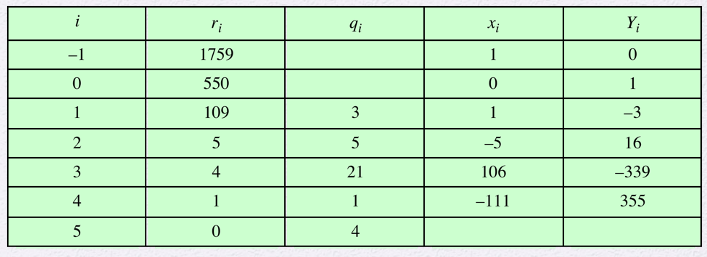

In [10]:
Dividend = 9721
Divisor = 1279
ri2 = Dividend
ri1 = Divisor
xi2 = 1
yi2 = 0
xi1 = 0
yi1 = 1
i = -1
quotient = 0

# 1.2
def ext_euclidean(ri1,ri2,i,xi1,yi1,xi2,yi2):

    if ri2 % ri1 == 0 :
        return print(f'Final Iteration {i} : (a * x) + (b * y) = gcd(a,b) = {ri1} = \n ' +
                      f'({Dividend} * {xi1}) + ( {Divisor} * {yi1}) = {(Dividend * xi1) + (Divisor * yi1)}')
    
    else:

        #First 2 rows just show input i 0 & -1
        if( i == -1 ):
            print(f'i : {i} ')
            print(f'ri : {ri2}')
            print(f'qi :  ')
            print(f'xi : {xi2} ')
            print(f'yi : {yi2}\n')


        if(i == 0 ):
            print(f'i : {i} ')
            print(f'ri : {ri1}')
            print(f'qi :   ')
            print(f'xi : {xi1} ')
            print(f'yi : {yi1}\n')


        if(i > 0):

            #Bereken nieuwe restwaarde zolang deze niet nul is
            
            ri = ri2 % ri1
            quotient = ( ri2 - ri) / ri1

            #Bereken nieuwe x en y waarden
            
            xi = xi2 - ( quotient * xi1 )
            yi = yi2 - ( quotient * yi1 )

            print(f'i : {i} ')
            print(f'ri : {ri}')
            print(f'qi : {quotient} ')
            print(f'xi : {xi} ')
            print(f'yi : {yi}\n')
            
            xi2 = xi1
            yi2 = yi1
            xi1 = xi
            yi1 = yi
            ri2 = ri1
            ri1 = ri

        i += 1

        ext_euclidean(ri1,ri2,i,xi1,yi1,xi2,yi2)
    
ext_euclidean(ri1,ri2,i,xi1,yi1,xi2,yi2)
    




i : -1 
ri : 9721
qi :  
xi : 1 
yi : 0

i : 0 
ri : 1279
qi :   
xi : 0 
yi : 1

i : 1 
ri : 768
qi : 7.0 
xi : 1.0 
yi : -7.0

i : 2 
ri : 511
qi : 1.0 
xi : -1.0 
yi : 8.0

i : 3 
ri : 257
qi : 1.0 
xi : 2.0 
yi : -15.0

i : 4 
ri : 254
qi : 1.0 
xi : -3.0 
yi : 23.0

i : 5 
ri : 3
qi : 1.0 
xi : 5.0 
yi : -38.0

i : 6 
ri : 2
qi : 84.0 
xi : -423.0 
yi : 3215.0

i : 7 
ri : 1
qi : 1.0 
xi : 428.0 
yi : -3253.0

Final Iteration 8 : (a * x) + (b * y) = gcd(a,b) = 1 = 
 (9721 * 428.0) + ( 1279 * -3253.0) = 1.0


# Euclidean Algorithm


In [ ]:
a = 1160718174 
b = 316258250


# 1.2
def euclidean(a,b):
    if b == 0:
        return a
    else:
        print(f'Dividend : {a} \nDivisor : {b}')
        division = a / b 
        print(f'Division : {division}')
        r1 = a % b
        print(f'rest : {r1}')
        quotient = ( a - r1 ) / b 
        print(f'quotient : {quotient} \n')
        euclidean(b,r1)
    
euclidean(a,b)








# Polynomials 

- GF(2³) = 0,7 => binary 000 => 111 => veelterm van de 2e macht => priem veelterm van de 3e macht
- coëfficiënten 1 of 0
- x^7 + x^6 + x^5 + x^4 + x^3 + x^2 + x + 1
- Priem veelterm (X³+x+1) => altijd gegeven

- converteer nummer naar veelterm
  -  VB : 3 => 011 => (0*x²+1*x+1) = (x+1)
  -  3 * 6 = (011) * (110) = (x+1) * (x²+x) = x³ + x² + x² + x = x³ + x mod(x³ + x + 1) = 1